/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


En iyi hiperparametreler: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
En iyi doğruluk değeri (Doğrulama Kümesi): 0.7812293853073464
Model Doğruluğu (Test Verisi): 0.7447916666666666


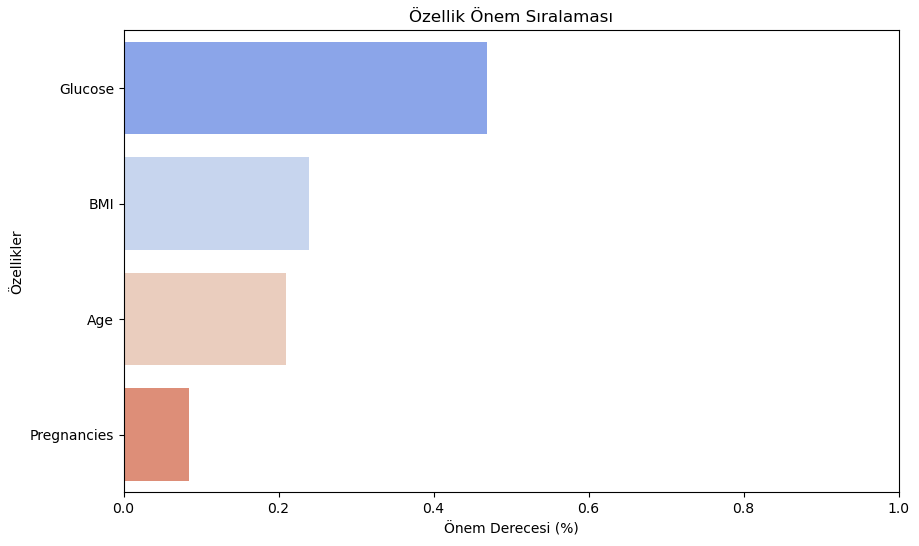

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükledik.
data = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')

# Bağımsız değişkenleri ve hedef değişkeni ayırdık.
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Önemli özellikleri seçtik.(Korelasyon haritasına göre).
important_features = ["Glucose", "BMI", "Age", "Pregnancies"]

X_important = X[important_features]

# Veriyi train ve test kümelerine ayırdık.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.25, random_state=42)

# Hiperparametre optimizasyonu
param_grid = {
    'n_estimators': [50, 100, 200, 300], # Ağaç sayısı
    'max_depth': [None, 5, 10, 20],            # Ağacın maksimum derinliği
    'min_samples_split': [2, 5, 10],           # Dallanma için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],              # Yapraklar için minimum örnek sayısı
  }

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# En iyi hiperparametreler ve en iyi doğruluk değeri
print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi doğruluk değeri (Doğrulama Kümesi):", grid_search.best_score_)

# Test veri kümesi üzerinde tahmin yaptık
y_pred = grid_search.predict(X_test)

# Doğruluk değerini hesapla
accuracy = accuracy_score(y_test, y_pred)
print("Model Doğruluğu (Test Verisi):", accuracy) 

# Modelin eğitilmiş haliyle özellik önem sıralamasını alalım
feature_importances = grid_search.best_estimator_.feature_importances_

# Özellik önem sıralamasını bir DataFrame'e dönüştürelim
feature_importance_df = pd.DataFrame({'Features': important_features, 'Importance': feature_importances})

# Özellikleri öneme göre sıralayalım
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Özellik Önem Sıralaması Grafiğini çizelim
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=feature_importance_df, palette='coolwarm')
plt.title('Özellik Önem Sıralaması')
plt.xlabel('Önem Derecesi (%)')
plt.ylabel('Özellikler')
plt.xlim(0, 1)
plt.xticks(rotation=0)
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value*100:.2f}%', ha="left", va="center", color="white", fontweight='bold')
plt.show()